In [1]:
from transform_ps.etl.data_type import DataFactory
from transform_ps.etl.util import clear_cwd_cache

In [2]:
clear_cwd_cache()

cache is now empty


### Inputs

In [3]:
FY = 20
DONOR_DATA_FY = 13

### Setup

In [4]:
factory = DataFactory()

In [5]:
donor = factory.create_data_type('donor')
tix = factory.create_data_type('ticket')

### Import data for tickets and donors

In [6]:
tix.get_data(fys=[FY-1, FY])
donor.get_data(fys=DONOR_DATA_FY)

not found in cache
saved working to cache
Finished prepare_data in 10.2013 secs
not found in cache
saved working to cache
Finished prepare_data in 2.6602 secs


### Execute the tier analysis and get the aggregated data back

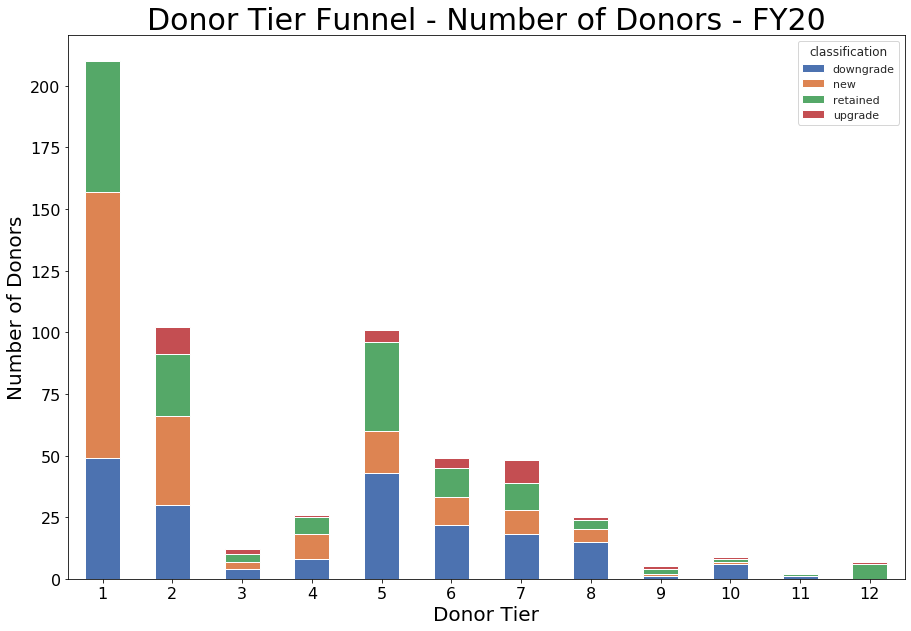

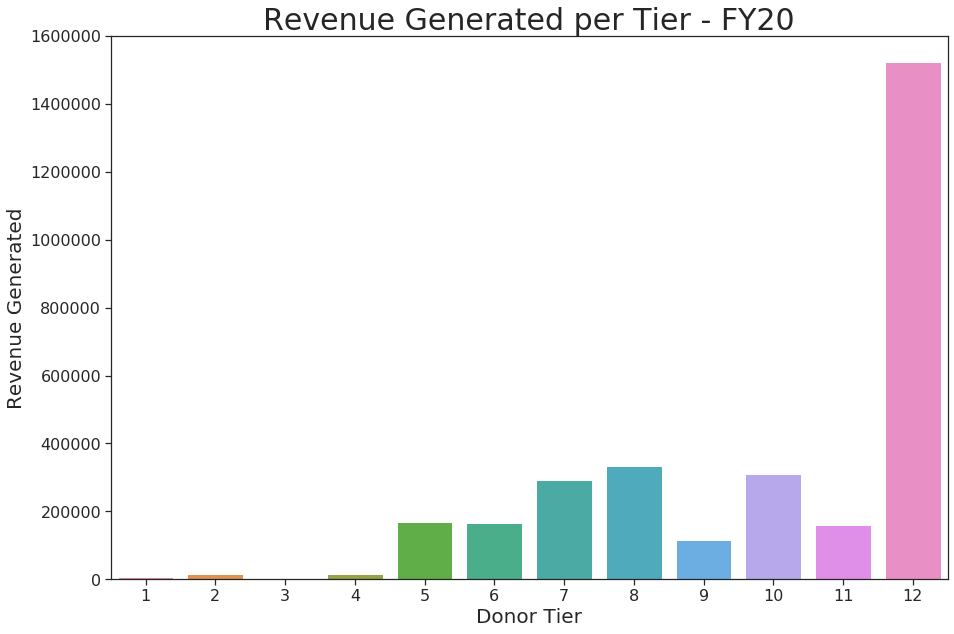

In [7]:
agg = donor.type.tier_analysis.execute(data=donor.working, fy=FY)

In [8]:
agg.set_index('classification', inplace=True)

### Identify the high capacity prospects

In [9]:
high_cap = donor.type.get_high_cap_prospects(data=donor.working, fy=FY)

not found in cache
saved working to cache
Finished prepare_data in 0.3568 secs


### Identify high capacity activities (activities are determined through number of concert purchases)

In [10]:
high_cap_mask = tix.working.summary_cust_id.isin(high_cap)
high_cap_tix = tix.working.loc[high_cap_mask].reset_index(drop=True)
high_cap_activities = high_cap_tix[['perf_dt', 'customer_no']].drop_duplicates()

### Get the KPIs

In [11]:
kpis = {
    'upgrade': f"{round(agg.loc['upgrade']['count'] / agg.loc['prior year donors']['count'] * 100, 2)}%",
    'downgrade': f"{round(agg.loc['downgrade']['count'] / agg.loc['prior year donors']['count'] * 100, 2)}%",
    'total retention': f"{round(agg.loc['total retained to date']['count'] / agg.loc['prior year donors']['count'] * 100, 2)}%",
    'high capacity prospects': len(high_cap),
    'avg activities by high cap prospects': len(high_cap_activities) / len(high_cap)
}

In [12]:
kpis

{'upgrade': '1.79%',
 'downgrade': '9.8%',
 'total retention': '29.64%',
 'high capacity prospects': 432,
 'avg activities by high cap prospects': 0.8981481481481481}

In [21]:
fy20 = donor.working[donor.working['fy'] == 20]
fy20 = fy20.groupby('campaign').agg({'summary_cust_id': 'nunique', 'gift_plus_pledge': 'sum'})
fy20.columns = ['donors', 'amount']
fy20.amount = fy20.amount.map(lambda x: '{:20,.2f}'.format(x))

In [30]:
fy20

,donors,amount
campaign,,
PS 19-20 Box Circle,102,"239,958.66"
PS 19-20 Capital Campaign,1,"20,000.00"
PS 19-20 Clx Opening Night,94,"442,800.00"
PS 19-20 Corporate,10,"313,500.00"
PS 19-20 Foundation,19,"899,250.00"
PS 19-20 Gala,3,"23,000.00"
PS 19-20 Gala Fund-A-Dream,1,500.00
PS 19-20 Government,3,"132,400.00"
PS 19-20 Individual,334,"2,035,802.25"
